In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

The assumed overfill is 6%.
The mean expected payout is $466.6 ($15.4).
The maximum expected payout is $474.2 ($7.8).
The minimum expected payout is $459.0 ($23.0).


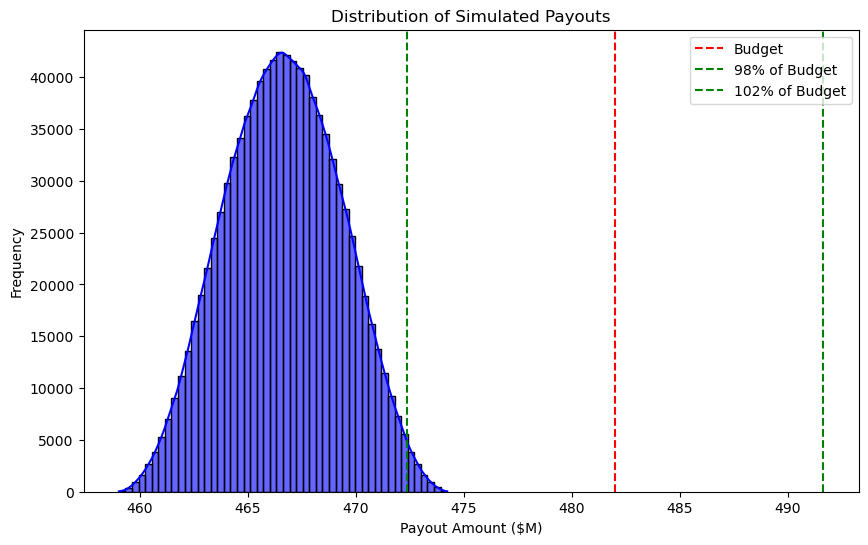

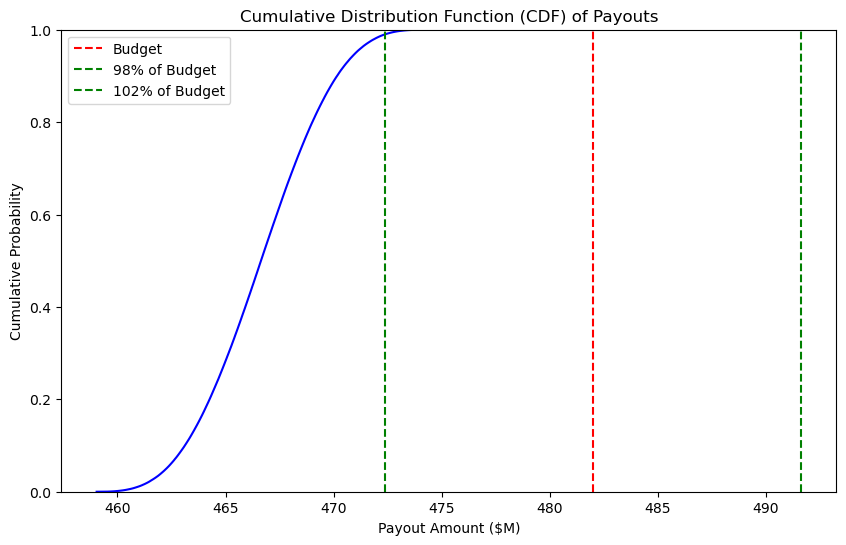


Overfill Sensitivity Analysis Dollars:

 Overfill  Mean Payout ($M)
     0.00        460.310836
     0.05        465.532119
     0.10        471.325679
     0.15        477.802666
     0.20        485.087746
     0.25        493.345718
     0.30        502.791200
     0.35        513.679747
     0.40        526.390645
     0.45        541.405365
     0.50        559.424805


In [4]:
# Input variables
budget = 482.0
gavi = 329.5
paid = 31.7
subs = 65.2
initial = 0.0
contracts = 32.1
new = budget - gavi - paid - subs - initial - contracts

# Sensitivity range for overfill
overfill_values = np.linspace(0, 0.5, 11)  # Testing from 0% to 50% overfill in increments of 5%
sims = 1000000

# Attrition ranges
subs_attrit_low, subs_attrit_high = 0.08, 0.18 #point estimate is 13%
init_attrit_low, init_attrit_high = 0.01, 0.02 # point estimate is 33%, modified for early approved new, need to collapse new into this line
contr_attrit_low, contr_attrit_high = 0.12, 0.22 #point estimate is 17%
new_attrit_low, new_attrit_high = 0.23, 0.43 #point estimate is 33%, need to push this into initial line later in the year

# Probability ranges
between_low = budget * 0.98
between_high = budget * 1.02

# Storage for sensitivity analysis
sensitivity_mean_results = []

# Running simulation for different overfill levels
for overfill in overfill_values:
    subs_simulated = (subs / (1 - overfill)) * (1 - np.random.uniform(subs_attrit_low, subs_attrit_high, sims))
    init_simulated = (initial / (1 - overfill)) * (1 - np.random.uniform(init_attrit_low, init_attrit_high, sims))
    contr_simulated = (contracts / (1 - overfill)) * (1 - np.random.uniform(contr_attrit_low, contr_attrit_high, sims))
    new_simulated = (new / (1 - overfill)) * (1 - np.random.uniform(new_attrit_low, new_attrit_high, sims))
    
    payout_simulated = gavi + paid + subs_simulated + init_simulated + contr_simulated + new_simulated
    
    mean_payout = np.mean(payout_simulated)
    sensitivity_mean_results.append([overfill, mean_payout])

# Convert results to DataFrame
df_sensitivity_mean = pd.DataFrame(sensitivity_mean_results, columns=["Overfill", "Mean Payout ($M)"])

# Display sensitivity results
def display_dataframe(name, dataframe):
    print(f"\n{name}:\n")
    print(dataframe.to_string(index=False))  # Displays the full DataFrame in a readable format


    
# Running one simulation with default overfill (0.12) for visualization
overfill = 0.06
subs_simulated = (subs / (1 - overfill)) * (1 - np.random.uniform(subs_attrit_low, subs_attrit_high, sims))
init_simulated = (initial / (1 - overfill)) * (1 - np.random.uniform(init_attrit_low, init_attrit_high, sims))
contr_simulated = (contracts / (1 - overfill)) * (1 - np.random.uniform(contr_attrit_low, contr_attrit_high, sims))
new_simulated = (new / (1 - overfill)) * (1 - np.random.uniform(new_attrit_low, new_attrit_high, sims))

payout_simulated = gavi + paid + subs_simulated + init_simulated + contr_simulated + new_simulated

# Headline stats
mean_payout = np.mean(payout_simulated)
max_payout = np.max(payout_simulated)
min_payout = np.min(payout_simulated)

# Statements
print(f"The assumed overfill is {overfill:.0%}.")
print(f"The mean expected payout is ${mean_payout:,.1f} (${(budget - mean_payout):,.1f}).")
print(f"The maximum expected payout is ${max_payout:,.1f} (${(budget - max_payout):,.1f}).")
print(f"The minimum expected payout is ${min_payout:,.1f} (${(budget - min_payout):,.1f}).")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram
sns.histplot(payout_simulated, bins=50, kde=True, color="blue", alpha=0.6, ax=ax)
ax.axvline(budget, color="red", linestyle="--", label="Budget")
ax.axvline(between_low, color="green", linestyle="--", label="98% of Budget")
ax.axvline(between_high, color="green", linestyle="--", label="102% of Budget")

ax.set_title("Distribution of Simulated Payouts")
ax.set_xlabel("Payout Amount ($M)")
ax.set_ylabel("Frequency")
ax.legend()
plt.savefig("histogram.png", dpi=300, bbox_inches='tight')
plt.show()

# CDF Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.ecdfplot(payout_simulated, color="blue", ax=ax)
ax.axvline(budget, color="red", linestyle="--", label="Budget")
ax.axvline(between_low, color="green", linestyle="--", label="98% of Budget")
ax.axvline(between_high, color="green", linestyle="--", label="102% of Budget")

ax.set_title("Cumulative Distribution Function (CDF) of Payouts")
ax.set_xlabel("Payout Amount ($M)")
ax.set_ylabel("Cumulative Probability")
ax.legend()
plt.savefig("cdf.png", dpi = 300, bbox_inches='tight')
plt.show()

display_dataframe("Overfill Sensitivity Analysis Dollars", df_sensitivity_mean)

In [3]:
print(new)

23.499999999999993
